##### Importing required libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
import numpy as np
import imageio as io
import os
import glob
import cv2

##### Reading from file

In [2]:
df1 = pd.read_csv('/home/tkarthikeyan/IIT Delhi/COL774-Machine Learning/Assignment 1/ass1_data/data/q1/linearX.csv', header=None)
df2 = pd.read_csv('/home/tkarthikeyan/IIT Delhi/COL774-Machine Learning/Assignment 1/ass1_data/data/q1/linearY.csv', header=None)

##### Creating a dataframe

In [3]:
frames = [df1, df2]
df = pd.concat(frames, axis=1, ignore_index=True)
df.rename(columns={0:"X",1:"Y"},inplace=True)
print(df)

       X        Y
0    9.1  0.99523
1    8.0  0.99007
2    9.1  0.99769
3    8.4  0.99386
4    6.9  0.99508
..   ...      ...
95   7.8  0.99620
96  10.2  0.99760
97   6.1  0.99464
98   7.3  0.99830
99   7.3  0.99670

[100 rows x 2 columns]


##### Describing the dataframe

In [4]:
df.describe()

,X,Y
count,100.000000,100.000000
mean,8.062000,0.996620
std,1.731805,0.002056
min,5.400000,0.990070
25%,7.000000,0.995375
50%,7.700000,0.996525
75%,8.925000,0.997620
max,15.600000,1.003200


##### Normalizing the data

In [5]:
norm_df = df.copy()
norm_df["X"] = (norm_df["X"] - norm_df["X"].mean())/norm_df["X"].std()

norm_df

,X,Y
0,0.599375,0.99523
1,-0.035801,0.99007
2,0.599375,0.99769
3,0.195172,0.99386
4,-0.670976,0.99508
...,...,...
95,-0.151287,0.99620
96,1.234550,0.99760
97,-1.132922,0.99464
98,-0.440003,0.99830


In [6]:
norm_df.describe()

,X,Y
count,1.000000e+02,100.000000
mean,3.819167e-16,0.996620
std,1.000000e+00,0.002056
min,-1.537125e+00,0.990070
25%,-6.132331e-01,0.995375
50%,-2.090305e-01,0.996525
75%,4.983241e-01,0.997620
max,4.352685e+00,1.003200


##### Plot the values of X and Y on a plane

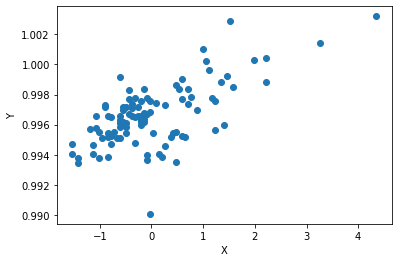

In [7]:
fig = plt.figure()
plt.scatter(norm_df["X"], norm_df["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("xy_plot_initial.png")
plt.show()

##### Batch Gradient Descent

###### Learning rate

In [8]:
eta = 0.1
theta = np.array([0.0,0.0])
m = norm_df["X"].count()

print("Learning rate: ", eta)

Learning rate:  0.1


###### Stopping criterion

The stopping criterion is usually of the form $ \| \nabla_\theta J_\theta(x_i) \|_2 $ <= $\phi$, where $\phi$ is small and
positive.

In [9]:
def convergence(grad_J_theta):
    phi = 0.0001
    if np.linalg.norm(grad_J_theta) < phi:
        return True
    else:
        return False

###### Algorithm

In [10]:
# For plotting purpose
theta_and_J_theta = []

In [11]:
while(True):
    J_theta = 0.0
    grad_J_theta = np.array([0.0,0.0])
    
    for i in range(m):
        xi, yi = norm_df["X"][i], norm_df["Y"][i]
        h_theta_xi = theta[0] + theta[1]*xi
        J_theta += ((yi - h_theta_xi)**2)
        grad_J_theta += (yi - h_theta_xi)*(-1)*np.array([1.0, xi])
        
    J_theta /= (2*m)
    grad_J_theta /= m

    #Storing theta and its corresponding J_theta for every iteration
    theta_and_J_theta.append((theta[0], theta[1], J_theta))
    
    #Stopping criteria
    if convergence(grad_J_theta):
        break
    
    #Updating parameters
    theta = theta - (eta*grad_J_theta)

###### Final set of parameters

In [12]:
print("Final set of parameters: ", theta)

Final set of parameters:  [0.99652637 0.00134681]


##### Two dimensional graph and hypothesis function

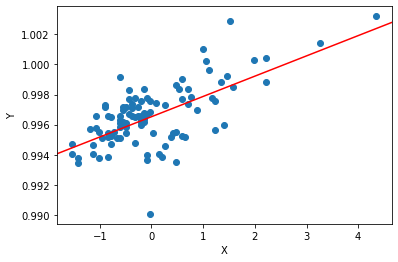

In [13]:
fig = plt.figure()
plt.scatter(norm_df["X"], norm_df["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.axline((0,theta[0]), slope=theta[1], color="red")
plt.savefig("xy_plot_hypothesis_line")
plt.show()

In [14]:
%matplotlib notebook

###### Simply plotting the J_theta corresponding to our theta values while learning

<IPython.core.display.Javascript object>


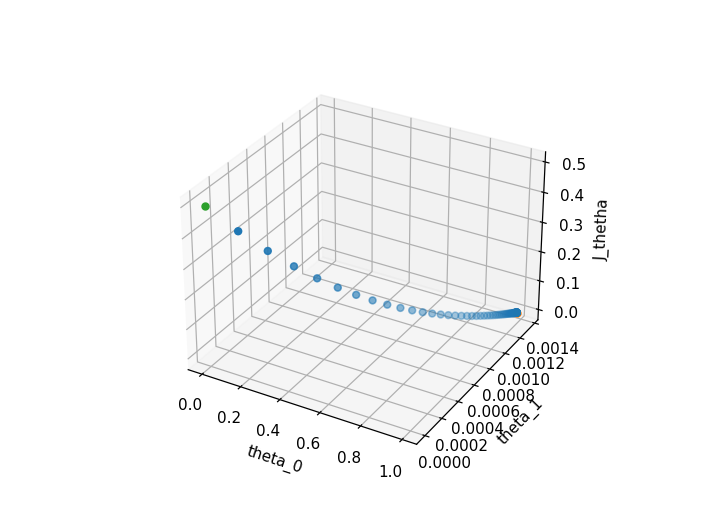

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = [theta_and_J_theta[i][0] for i in range(len(theta_and_J_theta))]
ys = [theta_and_J_theta[i][1] for i in range(len(theta_and_J_theta))]
zs = [theta_and_J_theta[i][2] for i in range(len(theta_and_J_theta))]
t = [i for i in range(len(theta_and_J_theta))]
ax.scatter(xs[1:-1], ys[1:-1], zs[1:-1], marker='o')
ax.scatter(xs[-1], ys[-1], zs[-1], marker='o')
ax.scatter(xs[0], ys[0], zs[0], marker='o')

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J_thetha')

plt.show()

###### Loss curve

<IPython.core.display.Javascript object>


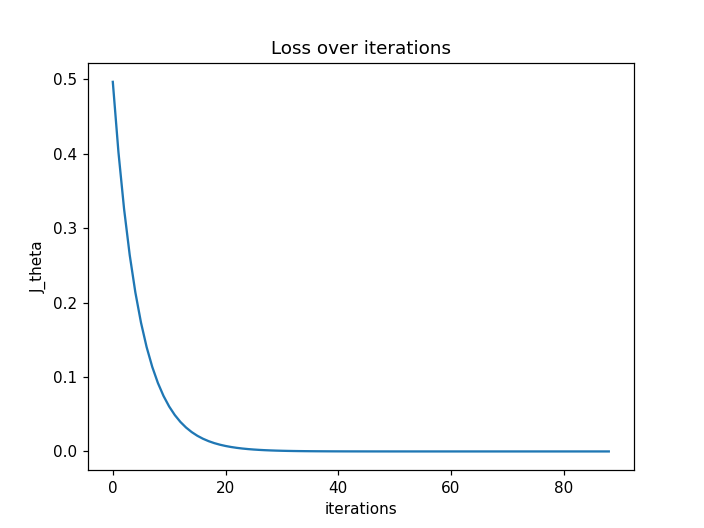

In [16]:
fig2 = plt.figure()
plt.plot(t,zs)
plt.title("Loss over iterations")
plt.ylabel("J_theta")
plt.xlabel("iterations")
plt.show()

###### 3D Mesh showing error function (J_theta)

<IPython.core.display.Javascript object>


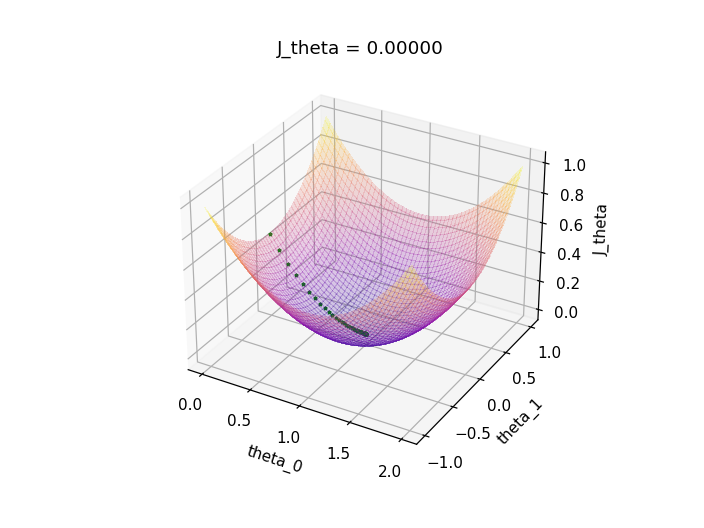

In [17]:
# x = np.linspace(-2,4,100)
# y = np.linspace(-4,4,100)
x = np.linspace(0,2,100)
y = np.linspace(-1,1,100)
Z = np.zeros((100,100))

X,Y = np.meshgrid(x,y)

#Below folder will store the 3D mesh frames
mesh_folder_name="3d_mesh_animation_"+str(eta)
t=0
os.mkdir(mesh_folder_name)

#Stride (in order to reduce the plots just for animation purpose)
stride = 1

for u in range(100):
    for v in range(100):
        J_theta = 0.0
        for i in range(m):
            xi, yi = norm_df["X"][i], norm_df["Y"][i]
            h_theta_xi = X[u][v] + Y[u][v]*xi
            J_theta += ((yi - h_theta_xi)**2)

        J_theta /= (2*m)
        Z[u][v] = J_theta
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap="plasma",linewidth=0,antialiased=False, alpha=0.2)
ax.set_xlabel("theta_0")
ax.set_ylabel("theta_1")
ax.set_zlabel("J_theta")
plt.show()

In [18]:
for i in range(len(theta_and_J_theta)):
    u,v,w = theta_and_J_theta[i][0], theta_and_J_theta[i][1], theta_and_J_theta[i][2]
    ax.scatter(u, v, w, c='green', marker='*', s=4)
    
    ax.set_title(f"J_theta = {theta_and_J_theta[i][2]:.5f}", loc="center")
    if t%stride==0:
        plt.savefig(mesh_folder_name+"/"+"image_"+str(t)+".png")
    t = t+1

In [19]:
plt.savefig("3d_mesh_plot.png")

<IPython.core.display.Javascript object>


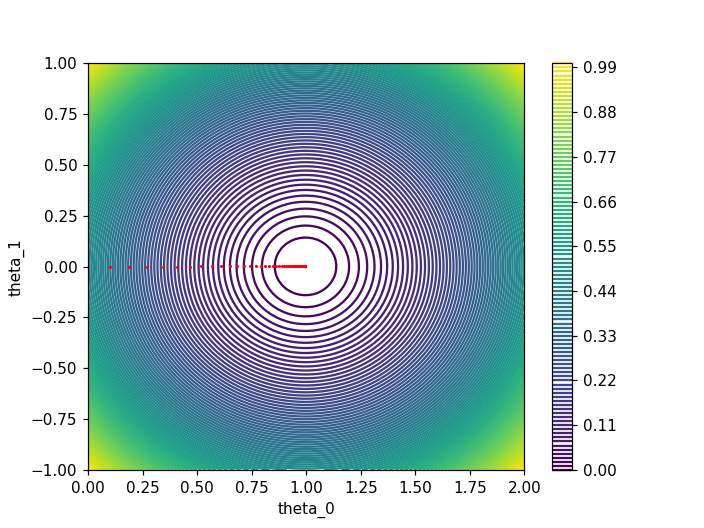

In [20]:
#Below folder will store the contour frames
contour_folder_name="contour_plot_animation_"+str(eta)
t=0
os.mkdir(contour_folder_name)

fig = plt.figure()
plt.contour(x,y,Z,100)
plt.colorbar()
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

In [21]:
for i in range(len(theta_and_J_theta)):
    x,y = theta_and_J_theta[i][0], theta_and_J_theta[i][1]
    plt.plot([x],[y],marker="o", markersize=1, markeredgecolor="red", markerfacecolor="green")
    if t%stride==0:
        plt.savefig(contour_folder_name+"/"+"image_"+str(t)+".png")
    t = t+1

In [22]:
plt.savefig("contour_plot.png")

###### Creating GIF from the folder of images

In [23]:
#contour gif
contour_frames = glob.glob(contour_folder_name+"/*")
contour_frames.sort()
# print(contour_frames)
images = []
for filename in contour_frames:
    images.append(io.imread(filename))
io.mimsave('contour.gif', images, duration=1)

In [24]:
#3d mesh gif
mesh_frames = glob.glob(mesh_folder_name+"/*")
mesh_frames.sort()
# print(contour_frames)
images = []
for filename in mesh_frames:
    images.append(io.imread(filename))
io.mimsave('mesh.gif', images, duration=1)

In [25]:
# img_array = []
# for filename in mesh_frames:
#     img = cv2.imread(filename)
#     height, width, layers = img.shape
#     size = (width,height)
#     img_array.append(img)

# out = cv2.VideoWriter('mesh.avi',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)

# for i in range(len(img_array)):
#     out.write(img_array[i])

# out.release()